# Amazon Prime and Disney+ Movies Recommendation System using Content Based Filtering




## Author: 
- Yash Pankhania (pankhania.y@northeastern.edu)

Github Repository URL: https://github.com/Draconian10/Netflix_Movie_Recommendation_System

## Abstract

  This notebook outlines the creation of a content-based recommendation system for movies and TV shows using a dataset from Disney+ and Amazon Prime. Content-based filtering is used to suggest similar items to those that the user has already enjoyed based on the item's features. The system utilizes movie and TV show metadata, including genres, descriptions, and IMDB Scores, to develop the content-based recommendation system. The process involves cleaning and feature engineering the data, followed by using cosine similarity to compute similarity scores between items. Finally, these similarity scores are used to recommend movies and TV shows to users based on their viewing history. The notebook offers a step-by-step guide with code samples and visualizations to help readers grasp the process of creating a content-based recommendation system using a real-world dataset.

## Recommendation System

- A recommendation system is a type of machine learning model that provides suggestions or recommendations to users based on their past behavior, preferences, or other characteristics.

- It is commonly used in e-commerce websites, social media platforms, music and video streaming services, and other online platforms to suggest products, content, or services that a user is likely to be interested in.

- There are different types of recommendation systems, including content-based filtering, collaborative filtering, and hybrid systems that combine both approaches.

- Content-based filtering recommends items based on their similarity to items that a user has interacted with in the past, while collaborative filtering recommends items based on the preferences of similar users.

- Recommendation systems use various techniques such as natural language processing, machine learning algorithms, and deep learning models to analyze user behavior and make predictions about what items they are likely to be interested in.

Amazon Prime Movies Data Set: https://www.kaggle.com/datasets/dgoenrique/amazon-prime-movies-and-tv-shows

Disney+ Movies Data Set: https://www.kaggle.com/datasets/dgoenrique/disney-movies-and-tv-shows

## Types of Recommendation Systems

There are mainly three types of recommendation systems:

1. **Content-based filtering** 

  This type of recommendation system recommends items to users based on their past behavior and preferences. It works by analyzing the content of items that the user has interacted with and finding other items with similar content. For example, if a user has watched and liked several action movies, the content-based filtering system will recommend more action movies to the user.

2. **Collaborative filtering** 
    
    This type of recommendation system recommends items to users based on the preferences of similar users. It works by analyzing the past behavior and preferences of a large group of users to find similarities and make recommendations. For example, if many users who have similar preferences as a particular user have watched and liked a certain movie, the collaborative filtering system will recommend that movie to the user.

3. **Hybrid recommendation systems** 

    This type of recommendation system combines both content-based and collaborative filtering techniques to provide more accurate and personalized recommendations to users. It works by analyzing both the content of items and the preferences of similar users to make recommendations. For example, a hybrid recommendation system might use content-based filtering to recommend items that are similar to items a user has interacted with and collaborative filtering to recommend items that are popular among similar users.

# Data and Libary imports


## Libary imports

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Titles imports

In [120]:
# Importing the Disney+ and Amazon Prime Titles data set into the DataFrame
disney_titles = pd.read_csv("https://raw.githubusercontent.com/Draconian10/Netflix_Movie_Recommendation_System/main/Disney_Titles_Dataset.csv")
amazon_titles = pd.read_csv("https://raw.githubusercontent.com/Draconian10/Netflix_Movie_Recommendation_System/main/Amazon_Prime_Titles_Dataset.csv")

## Concatenation

Here, we will be combining the Disney+ and Amazon Prime Data Set so that we can receive recommendations across the streaming platforms.

In [121]:
# Concatenating the Disney and Amazon Prime data set and dropping the Index column
merged_df = pd.concat([disney_titles, amazon_titles], axis = 0).reset_index()
merged_df.drop(['index'], axis=1, inplace=True)

In [122]:
# Displaying the DataFrame
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [123]:
# Print the number of rows and columns in the merged dataset
merged_df.shape

(12727, 15)

In [124]:
# Printing Top 10 popular Titles based on TMDB rating
popular_titles = merged_df.sort_values(by='tmdb_popularity', ascending=False)[['title', 'tmdb_popularity']].head(10)
print("Top 10 most popular titles on TMDB:")
print(popular_titles)

Top 10 most popular titles on TMDB:
                                                   title  tmdb_popularity
12681                                           Die Hart         3187.531
11666                                  The Eighth Clause         2528.826
1513                      Black Panther: Wakanda Forever         2159.377
1253                                     The Mandalorian         1607.738
11005                                    Shotgun Wedding          949.606
1622     The Simpsons Meet the Bocellis in Feliz Navidad          709.970
1531   Avatar: The Deep Dive - A Special Edition of 2...          620.722
960              Miraculous: Tales of Ladybug & Cat Noir          546.308
203                                         The Simpsons          538.281
3879                                             Pokémon          534.831


In [125]:
# Printing Top 10 popular Titles based on IMDB rating
highest_rated_titles = merged_df.sort_values(by='imdb_score', ascending=False)[['title', 'imdb_score']].head(10)
print("Top 10 highest rated titles on IMDB:")
print(highest_rated_titles)

Top 10 highest rated titles on IMDB:
                                                   title  imdb_score
12015                                         Pawankhind         9.9
6447                                      Romeo & Juliet         9.8
12492                             COD (Cash On Delivery)         9.8
11985  The 1975 'At Their Very Best' Live from Madiso...         9.7
10884                          Water Helps the Blood Run         9.7
11313                                        Last Resort         9.7
12577       Chhote Ustaad-Precaution Is Better Than Cure         9.6
9423                                     Suffer for Good         9.6
1104                                               Bluey         9.5
12598                                         Life After         9.5


## Data Cleaning

In [126]:
# Displaying information of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12727 non-null  object 
 1   title                 12727 non-null  object 
 2   type                  12727 non-null  object 
 3   description           12574 non-null  object 
 4   release_year          12727 non-null  int64  
 5   age_certification     5091 non-null   object 
 6   runtime               12727 non-null  int64  
 7   genres                12727 non-null  object 
 8   production_countries  12727 non-null  object 
 9   seasons               2091 non-null   float64
 10  imdb_id               11548 non-null  object 
 11  imdb_score            11104 non-null  float64
 12  imdb_votes            11081 non-null  float64
 13  tmdb_popularity       12141 non-null  float64
 14  tmdb_score            10455 non-null  float64
dtypes: float64(5), int6

In [127]:
# Checking for the count of NULL values in each column
merged_df.isna().sum()

id                          0
title                       0
type                        0
description               153
release_year                0
age_certification        7636
runtime                     0
genres                      0
production_countries        0
seasons                 10636
imdb_id                  1179
imdb_score               1623
imdb_votes               1646
tmdb_popularity           586
tmdb_score               2272
dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Distribution of Missing Values')

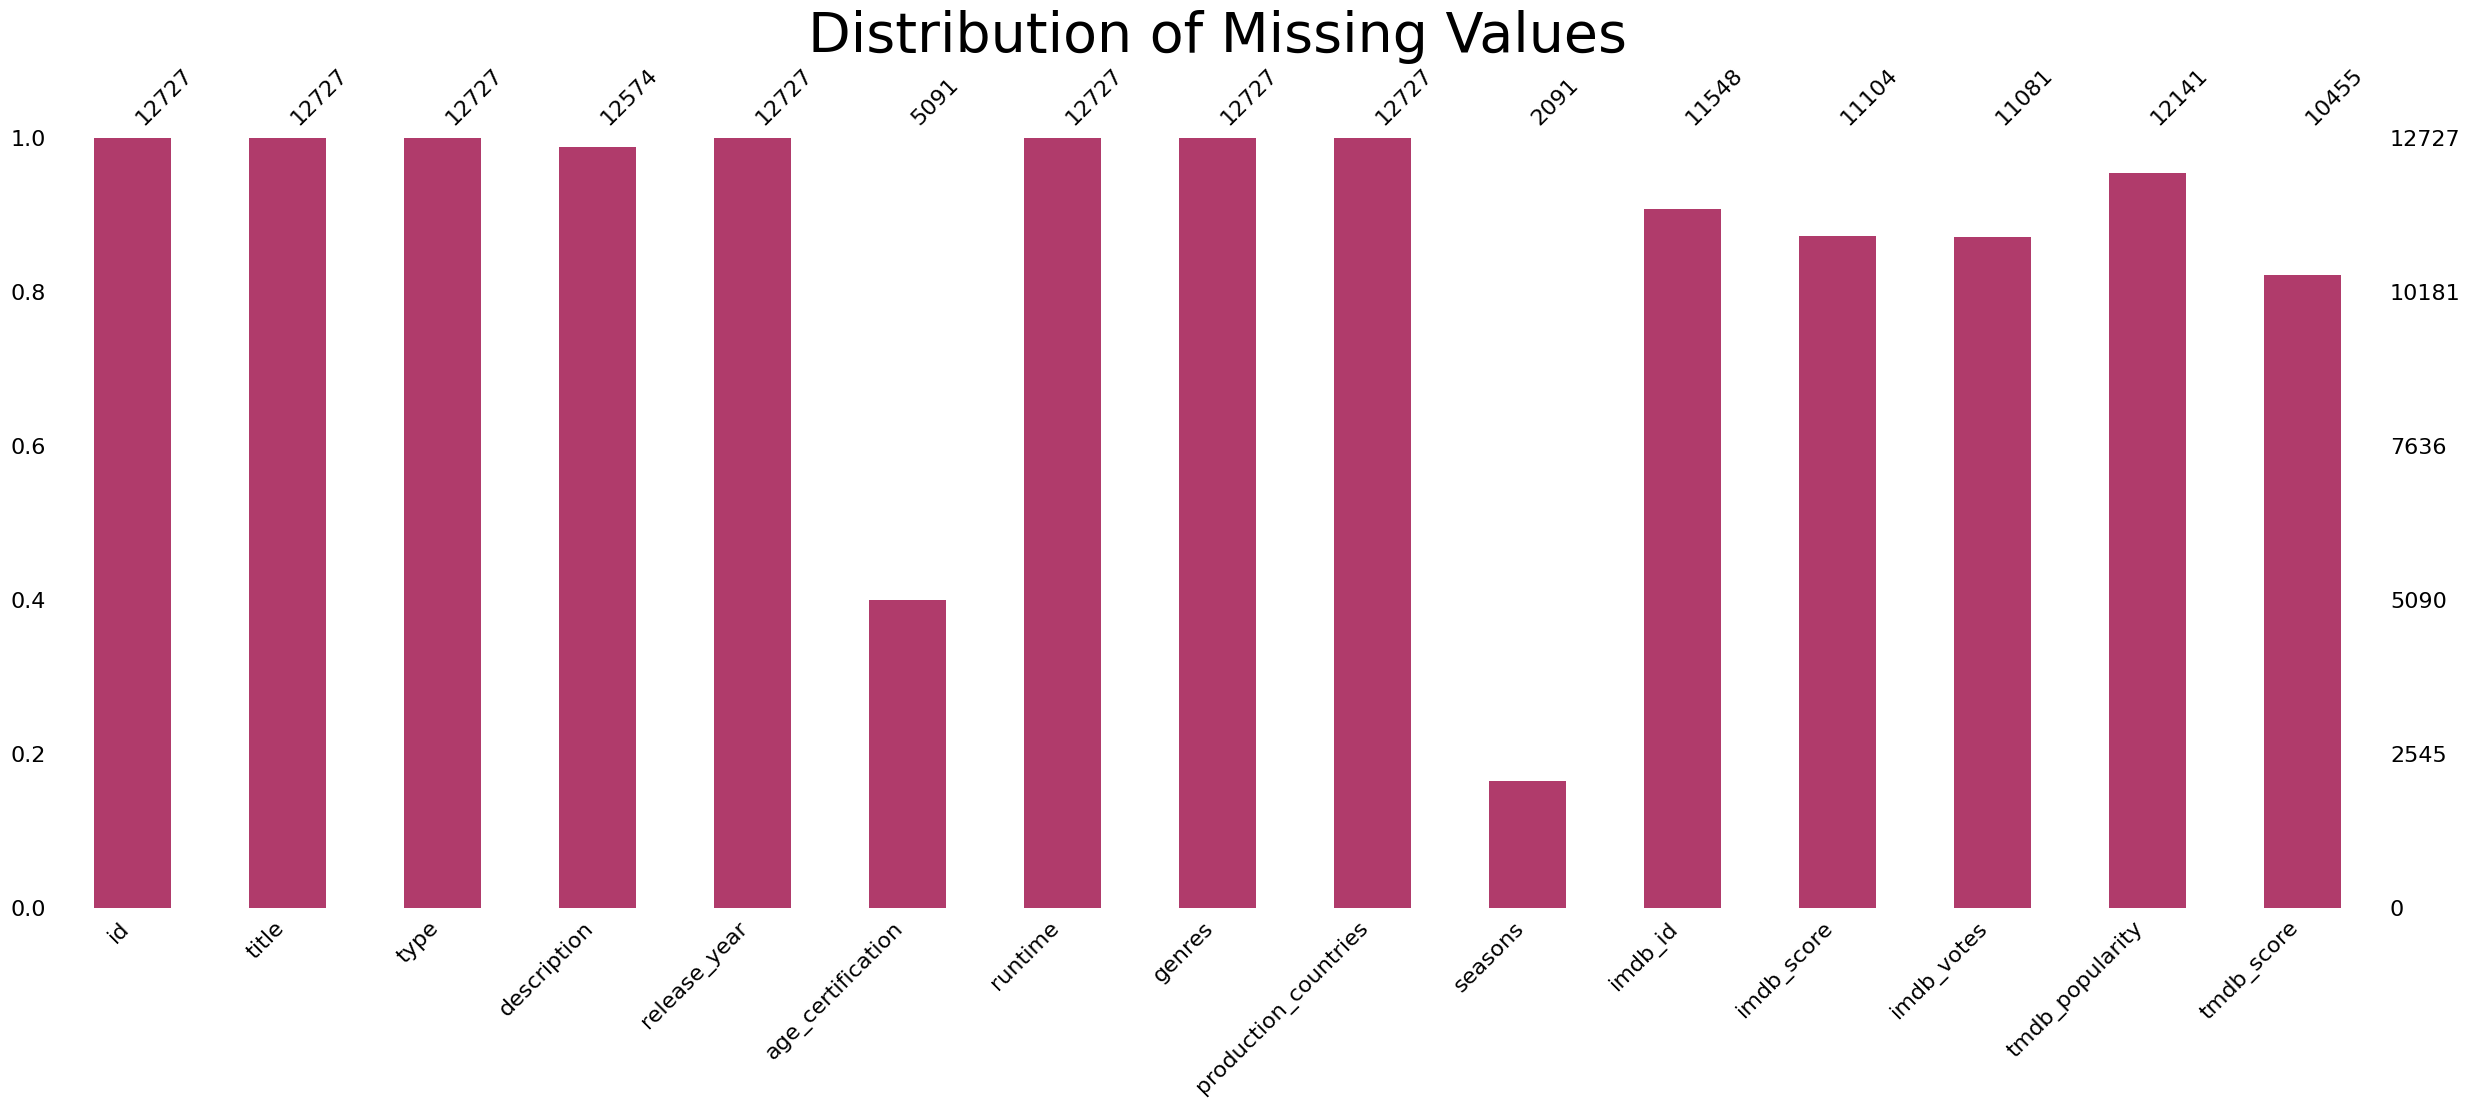

In [128]:
# Visualizing the total number of records present in each column
msno.bar(merged_df, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize = 40)

We can observe from the above graph that the columns 'Description', 'Age_Certification', 'Seasons', 'IMDB_ID', 'IMDB_Score', 'IMDB_Votes', 'TMDB_Popularity' and 'TMDB_Score' have missing values. They need to be handled using Exploratory Data Analysis so that we can perform further processing.

<Figure size 1500x500 with 0 Axes>

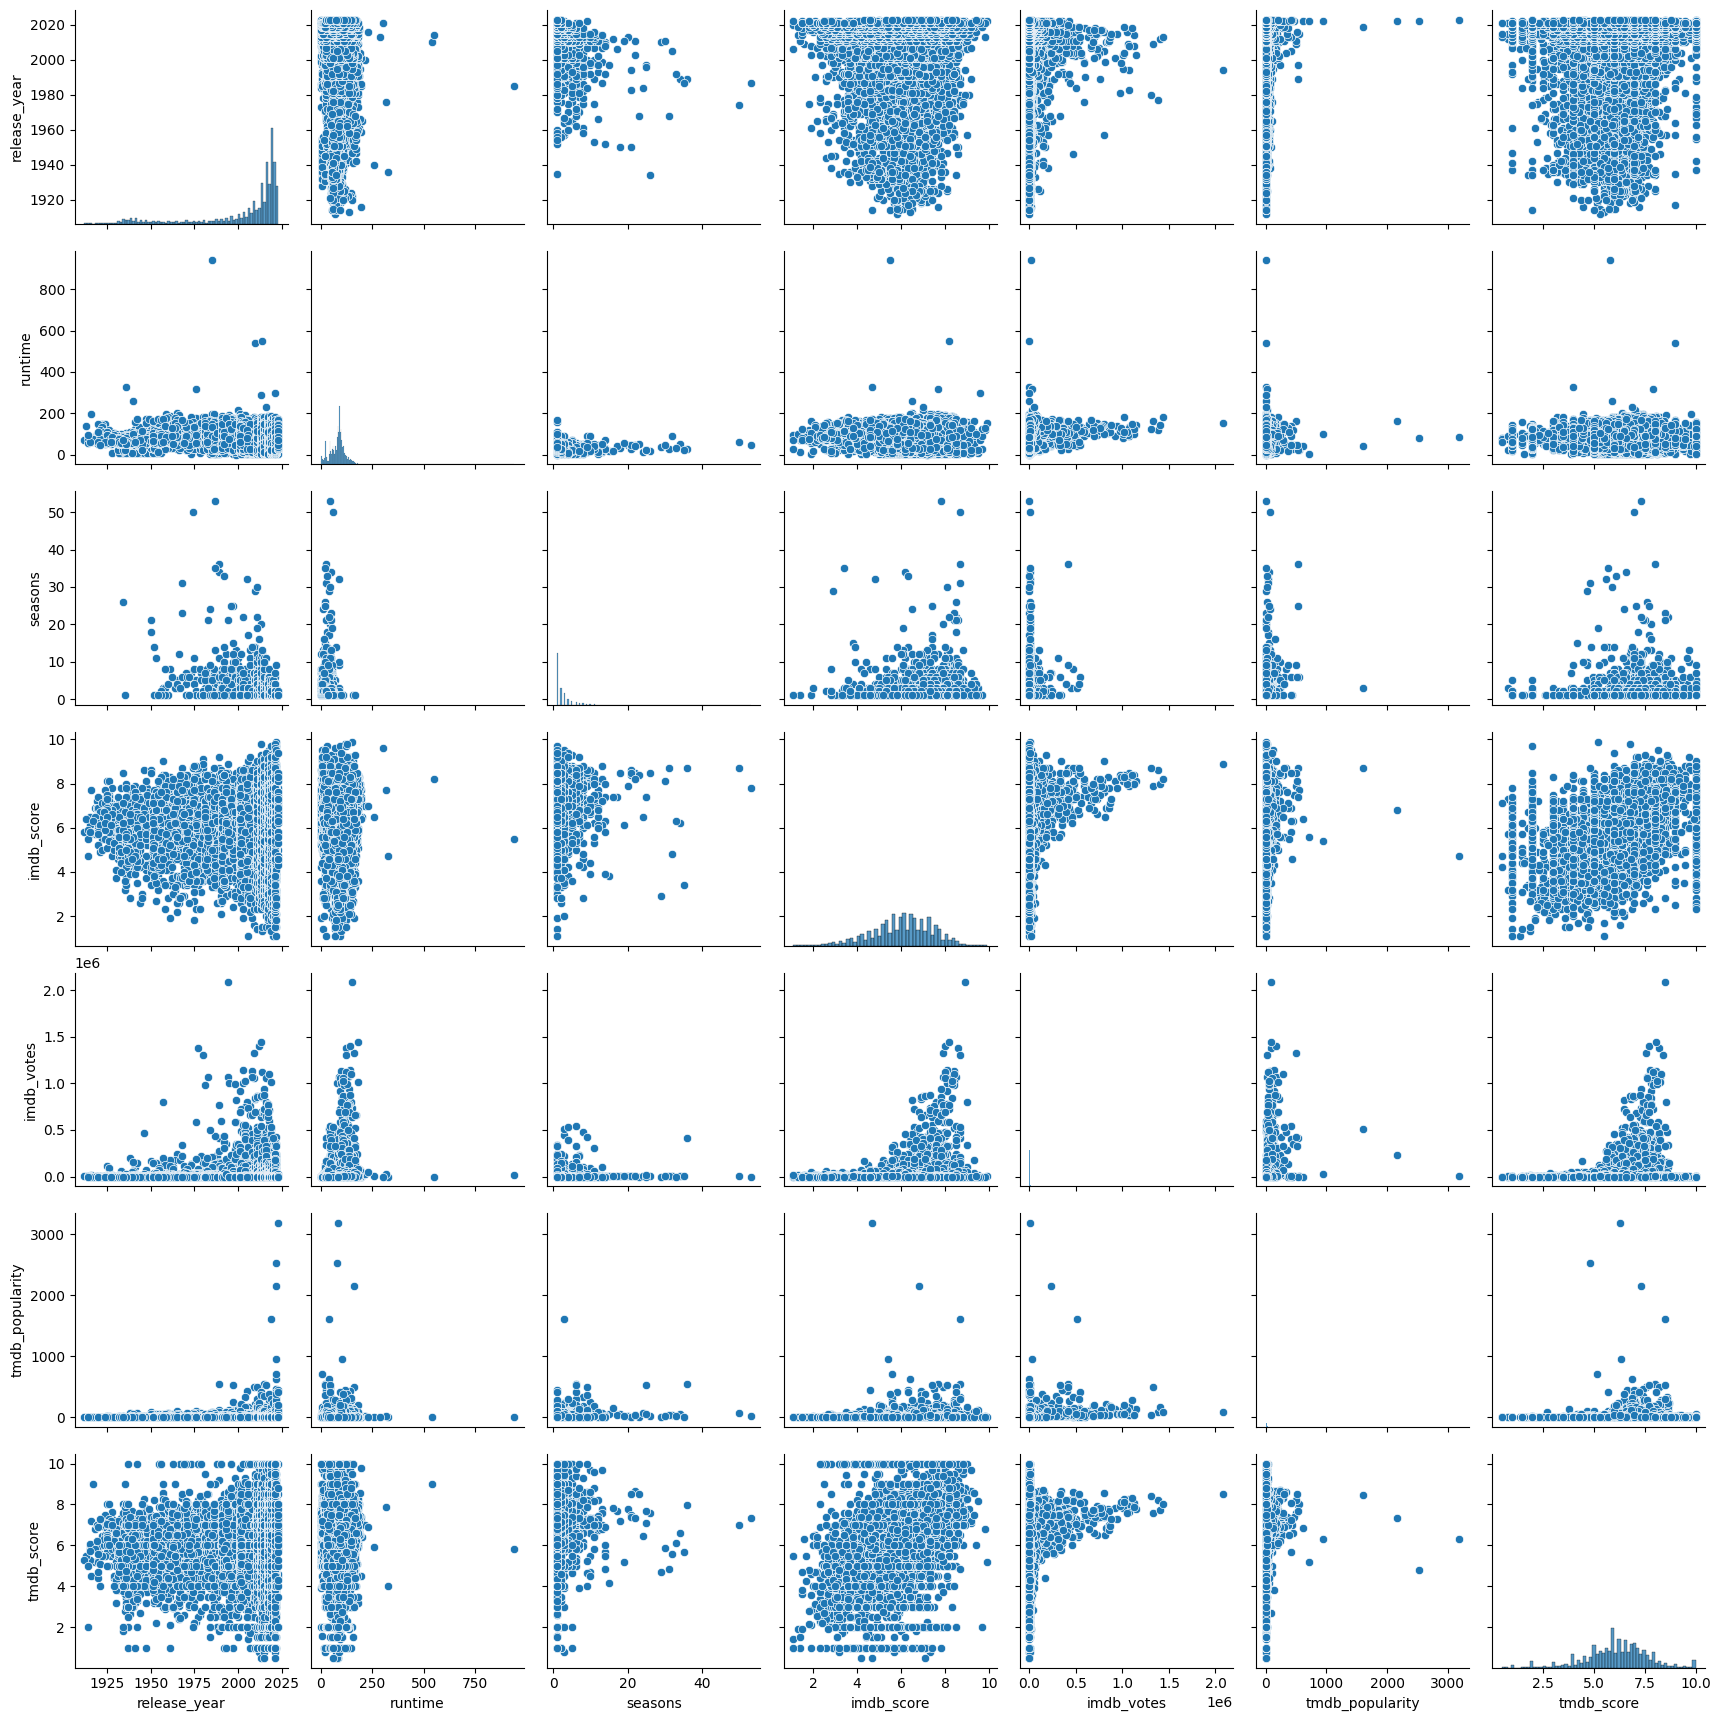

In [129]:
# Visualizing the pairplot of the numeric variables
plt.figure(figsize=(15,5))
sns.pairplot(merged_df)

- The columns 'IMDB_Score' and 'TMDB_Score' fairly follows a normal distribution
- The columns 'Runtime' and 'Seasons' follow a right skewed relationship where 'Release_Year' follows a left skewed relationship
- There is a positive relationship between 'IMDB_Votes' and 'IMDB_Score' as observed from the scatterplot
- The relation between 'IMDB_Score' and 'IMDB_Votes' is somewhat positive however, it drops off after a specific number of seasons 

In [130]:
# Generating correlation of data set
merged_df.corr()

<ipython-input-130-39c0278d5cc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,0.042592,-0.404837,0.034044,0.013707,0.048705,0.103327
runtime,0.042592,1.000000,-0.047055,-0.119708,0.135693,-0.013008,-0.117452
seasons,-0.404837,-0.047055,1.000000,0.027595,0.115042,0.199333,0.022721
imdb_score,0.034044,-0.119708,0.027595,1.000000,0.179960,0.091714,0.579928
imdb_votes,0.013707,0.135693,0.115042,0.179960,1.000000,0.277659,0.159351
tmdb_popularity,0.048705,-0.013008,0.199333,0.091714,0.277659,1.000000,0.099158
tmdb_score,0.103327,-0.117452,0.022721,0.579928,0.159351,0.099158,1.000000


<ipython-input-131-a5c0de65a5a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='RdYlGn')


<Axes: >

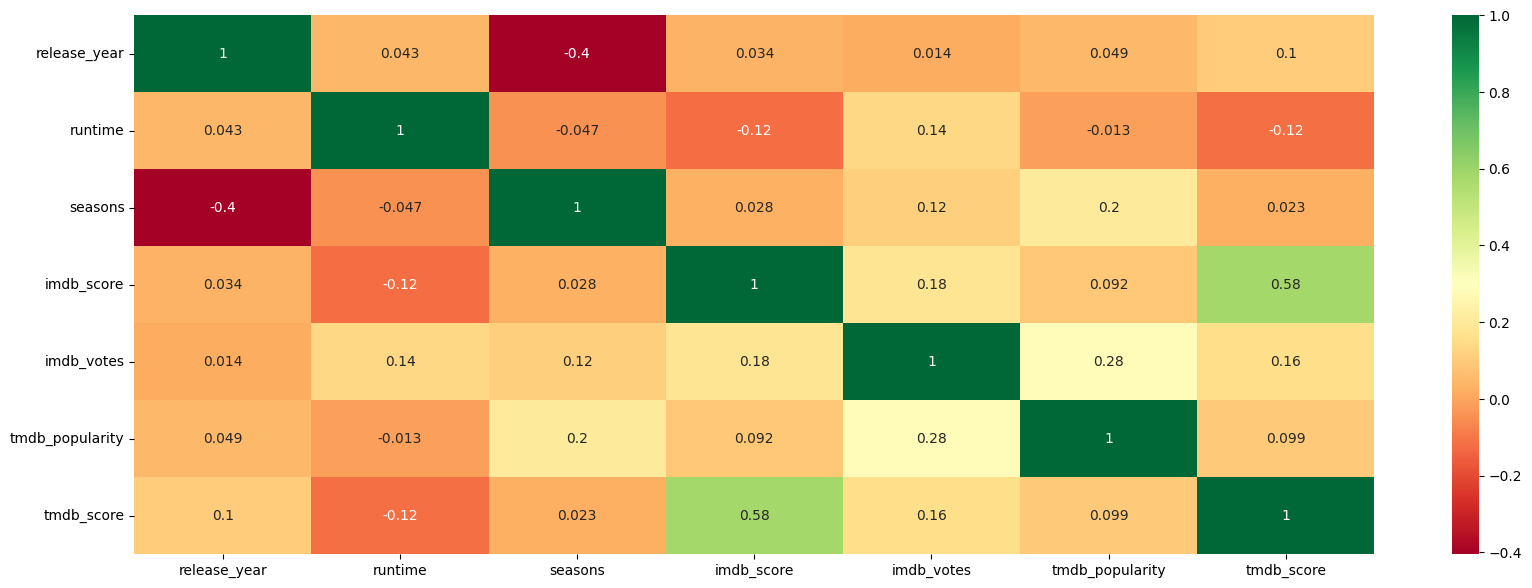

In [131]:
# Plotting Heat Map to check correlation for the data set
plt.figure(figsize=(20,7))
sns.heatmap(merged_df.corr(), annot=True, cmap='RdYlGn')

- The columns 'Seasons' and 'Release_Year' has negative correlation which indicates that an increase in Release_Year leads to a decrease in Seasons
- 'IMDB_Score' and 'TMDB_Score' has a correlation value of '0.58' which indicates that both the columns are positively correlated.
- Rest of the columns have a correlation value close to 0 which indicates no significant correlation

### Handling the 'genres' and 'production_countries' columns

In [132]:
# Handling the Genres column to fetch the first Genre from the list of Genres
merged_df['genres'] = merged_df['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
merged_df['genre'] = merged_df['genres'].str.split(',').str[0]

# Handling the Production Countries column to fetch the first Country from the list of Country
merged_df['production_countries'] = merged_df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
merged_df['production_country'] = merged_df['production_countries'].str.split(',').str[0]


<ipython-input-132-0980d6616534>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['genres'] = merged_df['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
<ipython-input-132-0980d6616534>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['production_countries'] = merged_df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


In [133]:
# Removing unwanted columns for further processing
merged_df.drop(['genres', 'production_countries'], axis=1, inplace=True)

In [134]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,NaN,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,NaN,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,NaN,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,NaN,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,NaN,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [135]:
# Checking for unique columns in the Genre column
merged_df['genre'].unique()

array(['family', 'horror', 'fantasy', 'animation', 'comedy', 'thriller',
       'romance', 'action', 'documentation', 'crime', 'western', '',
       'drama', 'scifi', 'history', 'music', 'reality', 'sport', 'war',
       'european'], dtype=object)

In [136]:
# Checking for unique columns in the Production Country column
merged_df['production_country'].unique()

array(['US', 'GB', 'CA', '', 'FR', 'SE', 'AU', 'SK', 'ES', 'JP', 'PL',
       'IN', 'CN', 'BR', 'DE', 'NZ', 'AR', 'CI', 'NL', 'AE', 'KR', 'IT',
       'CO', 'ZA', 'CL', 'AT', 'PH', 'BW', 'GR', 'TW', 'MX', 'DK', 'TR',
       'PR', 'SU', 'MA', 'HK', 'IE', 'CH', 'RO', 'YU', 'MC', 'IL', 'EG',
       'RU', 'LI', 'IR', 'PT', 'BE', 'FI', 'ID', 'VE', 'XC', 'NO', 'BG',
       'TH', 'LU', 'DO', 'JM', 'IS', 'RS', 'CZ', 'SG', 'HU', 'LT', 'UA',
       'KZ', 'NG', 'UY', 'MT', 'AF', 'VN', 'KE', 'BO', 'GE', 'TT', 'BY',
       'MY', 'PK', 'PE', 'XK', 'TC', 'LB', 'NP', 'MN', 'NI', 'SB', 'CR',
       'PA', 'UZ', 'NA', 'KH', 'QA', 'CM', 'EE', 'CU', 'LV', 'SY', 'BM',
       'IO', 'PF', 'HN', 'TN', 'EC', 'BD', 'MK'], dtype=object)

We can see that in both columns we have an empty value. Let's fill these values with NaN to make it easier to deal with in the future.

In [137]:
# Replacing the blank value with NULL in Genre and Production Country column
merged_df['genre'] = merged_df['genre'].replace('', np.nan)
merged_df['production_country'] = merged_df['production_country'].replace('',np.nan)

## Handling the 'Seasons' column

Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'.

In [138]:
# Checking the data for the type 'Movie'
merged_df[merged_df['type'] == 'MOVIE']

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,NaN,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,NaN,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,NaN,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,NaN,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,NaN,tt0032455,7.7,98764.0,43.609,7.382,animation,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12722,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,NaN,tt21946058,5.8,1269.0,4.403,4.300,action,IN
12723,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,NaN,tt23805304,5.6,812.0,3.406,8.000,drama,IN
12724,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,NaN,tt26548127,8.3,10.0,1.960,NaN,comedy,NaN
12725,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,NaN,NaN,NaN,NaN,1.336,NaN,NaN,NaN


In [139]:
# Checking whether the value for seasons is blank for all the records with types 'Movie' 
len(merged_df.loc[(merged_df['seasons'].isna()) & (merged_df['type'] == 'MOVIE')]) == merged_df.seasons.isna().sum()

True

So, all the null values from 'season' is from movies. Let's change the null values to 0.

In [140]:
# Setting the value for all the blank entries of seasons as 0
merged_df['seasons'].fillna(0, inplace=True)

In [141]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,0.0,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,0.0,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,0.0,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,0.0,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,0.0,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [142]:
# Checking for remaining NULL values in the DataFrame
merged_df.isna().sum()

id                       0
title                    0
type                     0
description            153
release_year             0
age_certification     7636
runtime                  0
seasons                  0
imdb_id               1179
imdb_score            1623
imdb_votes            1646
tmdb_popularity        586
tmdb_score            2272
genre                  238
production_country     728
dtype: int64

Now, let's drop the 'imdb_id', 'age_certification' and 'character' columns.

In [143]:
# Dropping unwanted columns not needed for processing
merged_df.drop(['imdb_id','age_certification'], axis=1, inplace=True)

In [144]:
# Replacing NULL values with N/A in Description column
merged_df['description'].fillna('N/A', inplace = True)

In [145]:
# Replacing Null Categorical values with the mode of that column
for i in merged_df[['genre', 'production_country']]:
    merged_df[i].fillna(merged_df[i].mode()[0], inplace=True)

In [146]:
merged_df.isna().sum()

id                       0
title                    0
type                     0
description              0
release_year             0
runtime                  0
seasons                  0
imdb_score            1623
imdb_votes            1646
tmdb_popularity        586
tmdb_score            2272
genre                    0
production_country       0
dtype: int64

## Median Imputation

- Median imputation is a technique for replacing missing values in a dataset with the median value of the variable in question. 
- It is a commonly used method in data preprocessing when dealing with missing data.
- To perform median imputation, first, the median value of the variable is calculated using the available data. Then, any missing values in the variable are replaced with this median value.
- Median imputation is a simple and quick method for handling missing data, but it has some limitations.
- It assumes that the missing data are missing at random and that the variable has a symmetric distribution.

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [147]:
from sklearn.impute import SimpleImputer

In [148]:
# Extracting non NULL records into a separate DataFrame to fit for MICE Imputation
non_null_df = merged_df[~merged_df.isnull().any(axis=1)]
non_null_df.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US


In [149]:
# Use Median Imputation to fill in missing values
columns_to_impute = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
imputer = SimpleImputer(strategy='median')
imputed_values = imputer.fit_transform(merged_df[columns_to_impute])

In [150]:
# Using MICE Imputation to impute Missing Values
merged_df.loc[:, columns_to_impute] = imputed_values

In [151]:
# Checking for NULL values in all the columns
merged_df.isna().sum()

id                    0
title                 0
type                  0
description           0
release_year          0
runtime               0
seasons               0
imdb_score            0
imdb_votes            0
tmdb_popularity       0
tmdb_score            0
genre                 0
production_country    0
dtype: int64

In [152]:
# Displaying information for each column of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12727 non-null  object 
 1   title               12727 non-null  object 
 2   type                12727 non-null  object 
 3   description         12727 non-null  object 
 4   release_year        12727 non-null  int64  
 5   runtime             12727 non-null  int64  
 6   seasons             12727 non-null  float64
 7   imdb_score          12727 non-null  float64
 8   imdb_votes          12727 non-null  float64
 9   tmdb_popularity     12727 non-null  float64
 10  tmdb_score          12727 non-null  float64
 11  genre               12727 non-null  object 
 12  production_country  12727 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.3+ MB


In [153]:
# Fetching the total rows and columns of the DataFrame
merged_df.shape

(12727, 13)

# Content Based Filtering

- Content-based filtering is a recommendation system technique that recommends items to a user based on the characteristics of items that the user has liked or interacted with in the past. 
- It assumes that a user's preferences are driven by the features or attributes of items they consume or interact with, rather than social or demographic factors.
- Content-based filtering starts by creating a user profile based on the user's past behavior, such as the items they have liked, rated, or purchased. 
- The system then identifies the features or attributes that are common to those items and uses them to recommend new items that have similar features or attributes.
- For example, in a movie recommendation system, a user's profile might include information about the genres of movies they have watched and enjoyed, such as action or romantic comedies. 
- The system would then recommend other movies that have similar genres or attributes, such as other action movies or romantic comedies.



## Plot Description based Recommender

Here, we will build a recommendation system based on the description of titles. We will calculate pairwise similarity scores for all movies/tv shows based on their descriptions and recommend titles with similar scores.



In [154]:
# Printing the list of descriptions for the titles
merged_df['description'].head()

0    Kris Kringle, seemingly the embodiment of Sant...
1    The Wind in the Willows: Concise version of Ke...
2    Cinderella has faith her dreams of a better li...
3    Dumbo is a baby elephant born with over-sized ...
4    Walt Disney's timeless masterpiece is an extra...
Name: description, dtype: object

## Adding Streaming Platform Section

We are adding a separate column called 'streaming_platform' to keep track of the platforms upon which the title is being streamed. When our data set contains data from various streaming platforms, it will be helpful to keep track of them.

In [155]:
# Generating a list to add the streaming platform to each title
platform = []
for i in merged_df['id']:
    movie_streaming = []
    if i in disney_titles['id'].values:
        movie_streaming.append('Disney+')
    if i in amazon_titles['id'].values:
        movie_streaming.append('Amazon Prime')

    platform.append(movie_streaming)

In [156]:
# Setting the list value into the Streaming Platform column
merged_df['streaming_platform'] = platform

In [157]:
merged_df.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,[Disney+]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,[Disney+]
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,[Disney+]
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,[Disney+]
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,[Disney+]


## Separating the data in Movies and TV Shows

In [158]:
# Extracting Movies from the Dataset consisting of both Movies and TV Shows
movies = merged_df[merged_df['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

# Extracting TV Shows from the Dataset consisting of both Movies and TV Shows
shows = merged_df[merged_df['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)

In [159]:
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,[Disney+]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,[Disney+]
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,[Disney+]
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,[Disney+]
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,[Disney+]


In [160]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts30718,Schoolhouse Rock!,SHOW,Schoolhouse Rock! is an American interstitial ...,1973,3,7.0,8.2,4108.0,3.125,7.800,animation,US,[Disney+]
1,ts22470,The Muppet Show,SHOW,Go behind the curtains as Kermit the Frog and ...,1976,25,5.0,8.4,25122.0,17.728,8.014,comedy,GB,[Disney+]
2,ts20949,Zorro,SHOW,"Diego de la Vega, the son of a wealthy landown...",1957,30,3.0,8.2,3799.0,59.219,7.720,action,US,[Disney+]
3,ts24939,Spider-Woman,SHOW,When Jessica Drew was bitten by a poisonous sp...,1979,21,1.0,5.8,873.0,17.427,7.900,animation,US,[Disney+]
4,ts27944,Spin and Marty,SHOW,Spin and Marty is a popular series of televisi...,1955,12,1.0,8.1,323.0,2.725,6.000,western,US,[Disney+]


## Term Frequency-Inverse Document Frequency (TF-IDF)

- Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a term within a document or a collection of documents.

- TF-IDF takes into account the frequency of a term (i.e., how often it appears) in a document, as well as its rarity in the entire collection of documents. It calculates the importance of a term in a document by multiplying its frequency (TF) by its rarity (IDF).

- TF is calculated as the number of times a term appears in a document divided by the total number of terms in the document. IDF is calculated as the logarithm of the total number of documents in the collection divided by the number of documents containing the term. This means that rare terms will have a higher IDF, while common terms will have a lower IDF.

- The TF-IDF score of a term in a document indicates how important or relevant that term is to that document. Terms with higher TF-IDF scores are considered to be more important or relevant to a document than terms with lower TF-IDF scores. This can be used in a variety of applications, such as text classification, document ranking, and information retrieval.

Refer: https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [161]:
# Define a TF-IDF Vectorizer Object to remove English stop words
tfidf = TfidfVectorizer(stop_words = 'english')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

# Output the shape of tfidf_matrix
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (10636, 31270)
Shape for Shows: (2091, 13938)


We see that over **16k** different words were used to describe the 3831 titles in our movies dataset, and **11k** different words to describe the 2306 titles in our shows dataset.

## Cosine Similarity

- Cosine similarity is a measure of similarity between two vectors in a  multidimensional space. It is often used in natural language processing and information retrieval to compare documents or text data.

- The cosine similarity between two vectors is calculated by taking the dot product of the two vectors and dividing it by the product of their magnitudes. In other words, it measures the cosine of the angle between the two vectors.

- In text data, cosine similarity can be used to compare the similarity between two documents or two sets of words.

Formula:

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaEEPQk9z7Fu1ij0WBFJ0HUQWQNfBvCM87VG4F64j0&s">

Now, we need to calculate the similarity score to calculate a numeric quantity that denotes the similarity between two movies/shows. 

Refer: https://www.geeksforgeeks.org/cosine-similarity/

In [162]:
# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

Now we create a way to identify the index of a movie/show in our data, given its title.

In [163]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [164]:
def get_title(title,indices):
    # Function to create the 'index searcher' that searches for user's title index
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return None

    if isinstance(index, np.int64):
        return index
    
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

Now, we define functions that accept a movie/show title as input and produce a list of the 10 most similar titles.

In [165]:

def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    # Function that takes a movie title as input and outputs top 10 similar movies in return
    
    title = get_title(title, indices_movies)
    if title == None:
        return 
    
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Fetching the pairwise similarity scores of all movies for that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Extracting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Fetching the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)

In [166]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    # Function that takes a TV show title as input and outputs top 10 similar movies in return
    title = get_title(title, indices_shows)
    if title == None:
        return 
    
    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Fetching the pairwise similarity scores of all shows for that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Extracting the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Fetching the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)

## Generating Recommendations Based on Movies and TV Shows

In [167]:
# Fetching movie recommendations for the movie 'K.G.F: Chapter 1'
get_recommendations_movie('Toy Story')

Title: Toy Story |  Year: 1995
********************************************************************************
                                                  title  release_year  \
410                                         Toy Story 3          2010   
261                                         Toy Story 2          1999   
975                                         Toy Story 4          2019   
1140  Beyond Infinity: Buzz and the Journey to Light...          2022   
686                                           Small Fry          2011   
6261       Andy Peters: Exclamation Mark Question Point          2015   
1119                                          Lightyear          2022   
5740                               A Monsterous Holiday          2014   
8180                           Andy Murray: Resurfacing          2019   
1758                          Love Laughs at Andy Hardy          1947   

     streaming_platform  
410           [Disney+]  
261           [Disney+]  
975   

The recommender suggested quite similar movies based on the movie name provided. The other suggestions belong to the same production studio which also plays a big role in the recommendation. They are also animated movies same as the movie provided.

In [168]:
# Fetching TV Show recommendations for the show 'The Mandalorian'
get_recommendations_show('The Mandalorian')

Title: The Mandalorian | Year: 2019
********************************************************************************
                                                 title  release_year  \
414                                     Obi-Wan Kenobi          2022   
284                            Marvel's Rocket & Groot          2017   
529   Disney Gallery: Star Wars: The Book of Boba Fett          2022   
912                                    Hunter x Hunter          2011   
1907                                    Rip the Falcon          2021   
417                              The Book of Boba Fett          2021   
144                                   Star Wars Rebels          2014   
1299                                  Starhunter ReduX          2018   
1763                              That Dirty Black Bag          2022   
410                           Star Wars: The Bad Batch          2021   

     streaming_platform  
414           [Disney+]  
284           [Disney+]  
529         

The TV Shows recommended all belong to the Star Wars Universe which is a good fit for the viewers who watched 'The Mandalorian'. They belong to similar genres with overlapping characters.

In [169]:
# Verifying recommendations for a movie not part of the data set
get_recommendations_movie('Random_Movie')


  Title not found


In [170]:
# Verifying recommendations for a TV show not part of the data set
get_recommendations_show('Random_TV_Show')


  Title not found


## Comparing Netflix Data Set along with Amazon Prime and Disney+ Data Set

- Netflix Data Set provided a common understanding of content based filtering on a single data set. In the Amazon Prime and Disney+ data set, we combined both the data sets to provide a more inclusive recommendation based on multiple streaming platforms
- The Netflix dataset is larger and more diverse than the Amazon Prime and Disney+ dataset, which could make it easier to build a robust recommendation system with higher accuracy. On the other hand, the Amazon Prime dataset is more specialized and provides more focused recommendations for a specific audience
- The availability and quality of the metadata in each dataset can impact the performance of the recommendation system. The metadata in all the data sets was incomplete or inaccurate which can cause the recommendation system to not be as effective. It's crucial to ensure the data preprocessing and feature engineering is done correctly to improve the accuracy of the recommendations.

## Conclusion

In conclusion, this notebook demonstrates the process of building a content-based recommendation system for movies and TV shows using a dataset from Disney+ and Amazon Prime. The system utilizes movie and TV show metadata to suggest similar items to those the user has previously enjoyed. The notebook provides a detailed guide with code examples and visualizations to help readers understand the process of developing a content-based recommendation system using real-world data. This recommendation system can enhance the user experience by providing personalized suggestions for movies and TV shows based on their viewing history.

## References

We have referred the following links and websites to understand the machine learning concepts:

1. GeeksforGeeks
2. towardsdatascience
3. scikitlearn documentation
4. Kaggle

Specific links have been provided within the notebook for detailed reference. We referred matplotlib and seaborn documentation for preparing data visualizations. We have extracted the data set on Netflix from Kaggle. Rest of the code is written individually.

MIT License

Copyright (c) 2022 Draconian10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.